# EQE-570 - Homework - Short Term Analysis

# Getting the data from the local file

Short term statistics describe the probabilities of qccurrence of wave heights and periods that occur within one observation or measurement of ocean waves. Such an observation typically consists of a wave record over a short time period, ranging from a few minutes to perhaps 15 or 20 minutes. 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  5 21:39:11 2021

@author: Fatih Bahri
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
veriler = pd.read_excel('surfaceelevations-shortterm.xlsx', index_col=0)
print(veriler)

           Water level - 1  Water level - 2  Water level - 3   \
Time(sec)                                                       
0.0              -0.290264        -0.682884         -0.278500   
0.1              -0.191486        -0.851155         -0.257531   
0.2              -0.093353        -0.995241         -0.234052   
0.3               0.001228        -1.113869         -0.210879   
0.4               0.089678        -1.207007         -0.191127   
...                    ...              ...               ...   
1199.6            0.572970        -2.271597          0.538685   
1199.7            0.758292        -2.318075          0.476646   
1199.8            0.938906        -2.317562          0.397117   
1199.9            1.101950        -2.272288          0.301991   
1200.0            1.235858        -2.186011          0.195375   

           Water level - 4  Water level - 5  Water level - 6  Water level - 7  
Time(sec)                                                                 

The dataset which given us consist of 12,000 records and 7 different water levels. This record is a time-serie of a 1200 seconds (20 minutes). Therefore this dataset can use for short term analysis. To understand what this dataset means we can plot them.

## Plotting the data

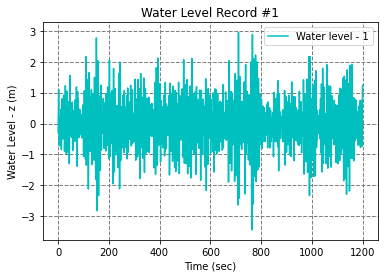

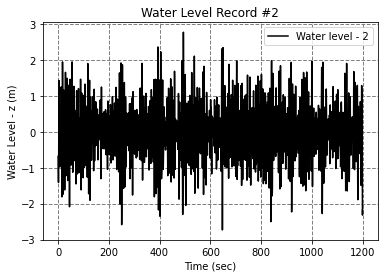

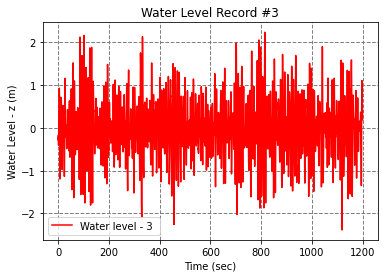

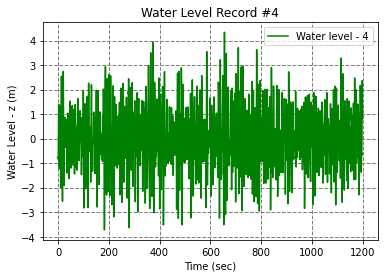

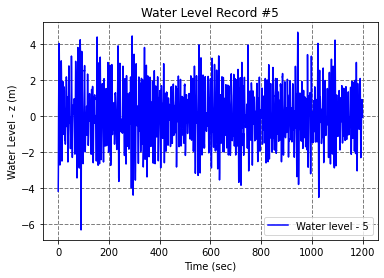

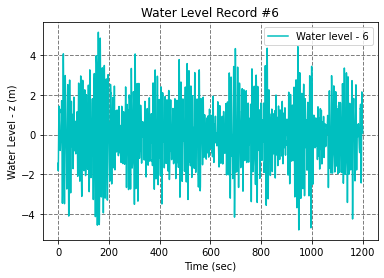

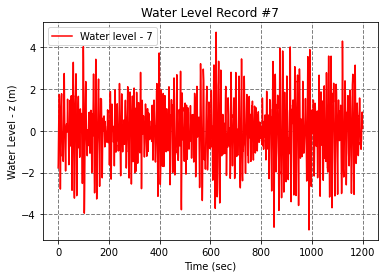

In [ ]:
veriler1 = veriler.iloc[:,0:1]
veriler2 = veriler.iloc[:,1:2]
veriler3 = veriler.iloc[:,2:3]
veriler4 = veriler.iloc[:,3:4]
veriler5 = veriler.iloc[:,4:5]
veriler6 = veriler.iloc[:,5:6]
veriler7 = veriler.iloc[:,6:7]
veriler1.plot(style='c')
plt.title("Water Level Record #1")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler2.plot(style='k')
plt.title("Water Level Record #2")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler3.plot(style='r')
plt.title("Water Level Record #3")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler4.plot(style='g')
plt.title("Water Level Record #4")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler5.plot(style='b')
plt.title("Water Level Record #5")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler6.plot(style='c')
plt.title("Water Level Record #6")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
veriler7.plot(style='r')
plt.title("Water Level Record #7")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
plt.show()

After this cell, for convenience we will work in 1st column only. All codes can be implement to other water levels.

In [ ]:
veriler1

,Water level - 1
Time(sec),
0.0,-0.290264
0.1,-0.191486
0.2,-0.093353
0.3,0.001228
0.4,0.089678
...,...
1199.6,0.572970
1199.7,0.758292
1199.8,0.938906


## Adding Water Level Fluctuation

Although the record is assumed to be stationary, there may be a small change in mean water level with time, as is the case in figures above. This could be, for example a result of tides. Because the record is short (20 minutes), the water level fluctuation is assumed to be a linear function of time, z' = (a + br) or general form of the water level function n = z-z' = z -(a +bt)

In [ ]:
waves_with_fluc = veriler1.copy()
for i in range(12001):
    i = i/10
    t = i
    a = 1
    b = 0.001
    n = veriler1.loc[t, 'Water level - 1']-(a+b*t)
    waves_with_fluc.at[t, 'Water level - 1'] = n
print(waves_with_fluc)

           Water level - 1
Time(sec)                 
0.0              -1.290264
0.1              -1.191586
0.2              -1.093553
0.3              -0.999072
0.4              -0.910722
...                    ...
1199.6           -1.626630
1199.7           -1.441408
1199.8           -1.260894
1199.9           -1.097950
1200.0           -0.964142

[12001 rows x 1 columns]


## Plotting water levels with fluctuation for first 60 seconds

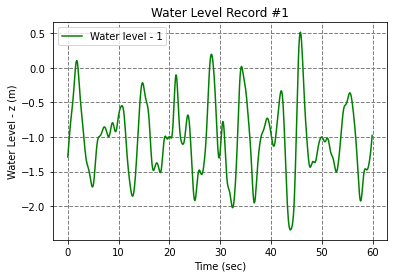

In [ ]:
wave_graph = waves_with_fluc.iloc[:600,:]
wave_graph.plot(style='g')
plt.title("Water Level Record #1")
plt.grid(color='gray', linestyle='dashed', linewidth=1)
plt.ylabel("Water Level - z (m)")
plt.xlabel("Time (sec)")
plt.show()

# Zero-Crossing Analysis

For the implement of zero-crossing analysis we need to define the parameters of Rayleigh distribution. We will use Python methods from math library.
After defining standart deviation (Ϭ), we can use Table 3.1 (Commonly Used Wave Height Parameters) from the book of [J. William Kamphuis] With this table we can easily calculate wave height parameters.

Standart Deviation (sigma) = 0.7844592643525365
Variance = Standart Deviation **2 = 0.6154276187899752
Hs =  3.137837057410146 m
Average Wave Height H- = 1.9663477723223024 m
Hrms = 2.2187858615531564 m
Average of highest 1% of the waves H-0.1 = 5.232343293231419 m


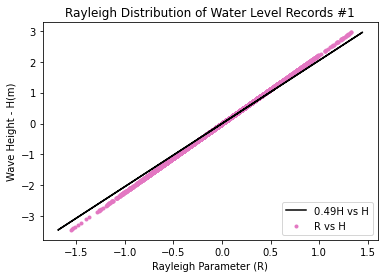

In [ ]:
from statistics import pvariance, variance, pstdev, stdev
from math import pi, sqrt
my_datalist = veriler1['Water level - 1'].tolist()
sigma = pstdev(my_datalist)
print('Standart Deviation (sigma) =', pstdev(my_datalist))
# print(stdev(my_datalist))
print('Variance = Standart Deviation **2 =',variance(my_datalist))
# print(pvariance(my_datalist))
Hs = sigma*4
print('Hs = ', Hs, 'm')
print('Average Wave Height H- =', sqrt(2*pi)*sigma, 'm')
Hrms = sqrt(2)*2*sigma
print('Hrms =', sqrt(2)*2*sigma, 'm')
print('Average of highest 1% of the waves H-0.1 =', 6.67*sigma, 'm')
R = []
H = []
y = []
for i in range(12000):
    H.append(my_datalist[i])
    R.append(my_datalist[i]/Hrms)
    y.append(my_datalist[i]*0.49)
plt.scatter(R,H, label='R vs H', marker='.', c='#e377c2')
plt.plot(y,H, label='0.49H vs H', c='#000000')
plt.legend(loc=4)
plt.xlabel('Rayleigh Parameter (R)')
plt.ylabel('Wave Height - H(m)')
plt.title('Rayleigh Distribution of Water Level Records #1')
plt.show()

Ϭ was found as 0.784

S (Variance) found as 0.615

________________________

The best fit line through the measured values has a slope of 0.49 as shown figure above.
An estimate of average wave period may be obtained by dividing the record length (tR= 1200 seconds) by the number of waves (Nw) to find period(T) in seconds.
Therefore we need to find out number of waves and period first.

In [ ]:
!pip install LaTeX

In [ ]:
from IPython.display import display, Latex, Math

In [ ]:
display(Math(r'$$\overline{H}=1.966m \\'))
display(Math(r'$$H_s = 3.138m \\'))
display(Math(r'$$H_rms = 2.2189m \\'))
display(Math(r'$$\overline{H}_{1/10}=5.232m \\'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Define number of waves (Nw) & Period (T)

To define the number of waves (Nw) we can use an algorith like below. This code counts the points in zero-cross.

In [ ]:
import math
say=0
waves1 = veriler.iloc[:,0:1]
for i in range(1200):
    ilk = waves1.loc[i, 'Water level - 1']
    son = waves1.loc[i+1, 'Water level - 1']
    # If the sign of wave(t) and wave(t+1) are same, Nw would increase.
    if math.copysign(1,ilk) == math.copysign(1,son):
        continue
    else:
        say +=1
print('Number of waves (Nw) =', say)

Number of waves (Nw) = 479


Now we can calculate period (T)


In [ ]:
display(Math(r'$$\overline{T} = \frac{N_{rec}}{N_w}\\'))

<IPython.core.display.Math object>

In [ ]:
T = 1200/say
display(Math(r'$$\overline{T} ='))
print(round(T,3),'seconds')

<IPython.core.display.Math object>

2.505 seconds


### Peak wave period (Tp)

The peak wave period, Tp, is the wave period with the highest energy. The analysis of the distribution of the wave energy as a function of wave frequency f=1/T for a time-series of individual waves is referred to as a spectral analysis. Wind wave periods (frequencies) often follow the so-called JONSWAP or Pierson-Moskowitz spectra. The peak wave period is extracted from the spectra.

In [ ]:
display(Math(r'$$T_p = 5 \sqrt{H_{m0}} \\'))

<IPython.core.display.Math object>

In [ ]:
Tp = 5*sqrt(Hs)
display(Math(r'$$T_p ='))
print(round(Tp,3), 'seconds')

<IPython.core.display.Math object>

8.857 seconds


### Peak wave frequecy (fp)

In [ ]:
display(Math(r'$$f_p = \frac{1}{T_p}\\'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'$$T_p ='))
print(round(1/Tp,3), 'Hz')

<IPython.core.display.Math object>

0.113 Hz


# Spectral Parameters

General form of the moment of the spectrum are defined as:

In [ ]:
display(Math(r'$$m_{n} = {\int_{0}^{\infty} f^n S(f) df}'))

<IPython.core.display.Math object>

In [ ]:
display(Math(r'$$T_{01} = \frac{\int_{0}^{\infty} E(f) df}{\int_{0}^{\infty} E(f) fdf}'))
display(Math(r'$$T_{02} = \sqrt{\frac{\int_{0}^{\infty} E(f) df}{\int_{0}^{\infty} E(f) f^2df}}'))
display(Math(r'$$T_E = \frac{\int_{0}^{\infty} E(f) f^{-1} df}{\int_{0}^{\infty} E(f) df}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

If we assume this distribution is a Pierson-Moskowitz distribution so, we can write those equations,

In [ ]:
display(Math(r'$$T_{01} =0.69T_p'))
display(Math(r'$$T_{02} =0.58T_p'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
display(Math(r'$$T_{01} ='))
print(0.69*Tp)
display(Math(r'$$T_{02} ='))
print(0.58*Tp)

<IPython.core.display.Math object>

6.111309644898077


<IPython.core.display.Math object>

5.1370428899143254


# References

Introduction to Coastal Engineering and Management, J. William Kamphuis

Random Wave Analysis, USNA.EDU, https://www.usna.edu/NAOE/_files/documents/Courses/EN330/Random-Wave-Analysis.pdf

LINEAR WAVE THEORY PART B, Random waves and wave statistics, HARALD E. KROGSTAD AND ØIVIND A. ARNTSEN,https://folk.ntnu.no/oivarn/hercules_ntnu/LWTcourse/lwt_ran_2000_part_b.pdf

Influence of Spectral Width on Wave Height Parameter Estimates in Coastal Environments, Justin P. Vandever Eric M. Siegel John M. Brubaker and Carl T. Friedrichs, https://www.nortekgroup.com/assets/documents/Influence-of-spectral-width-on-wave-height-parameter-estimates-in-coastal-environments.pdf

http://www.coastalwiki.org/

https://matplotlib.org/

https://link.springer.com/

https://towardsdatascience.com/

#### Fatih Bahri AYDIN
#### 205023030010